In [1]:
# Importer
import classes.utils as utils
from classes.splitter import Splitter
from classes.classifier_trainer import ClassifierTrainer


from sklearn.ensemble import RandomForestClassifier

import numpy as np

utils.set_parent_directory_as_working_directory()

# TODO: Move this to a config file
# Importing
DATA_FOLDER = "./data"


FE_DATA_PATH = DATA_FOLDER +'/fe_data.csv'
DATES_DATA_PATH = DATA_FOLDER +'/dates_data.csv'

SEED = 47

splitter_name = "splitter"

splitter = Splitter(
    name = splitter_name
    , data_path = FE_DATA_PATH
    , date_cols = []
    , target_variable = 'loan_status'
    , destination_directory = DATA_FOLDER
    , dates_data_path = DATES_DATA_PATH
    , column_to_split_by = 'finished_d'
    , test_size = 0.3
    , random_state = SEED
)

splitter.execute()



-------------- Executing splitter --------------
Data loaded from ./data/fe_data.csv
Dates data loaded from ./data/dates_data.csv
Test and train attributes defined 0.3.
        Test size: 678201
        Train size: 1582467
--------------- splitter finished ---------------


In [12]:
splitter.set_train_test_filtered(number_of_months=180)


KeyboardInterrupt: 

In [3]:
splitter.set_train_test_filtered(number_of_months=120)


trainer = ClassifierTrainer(
    name = 'trainer_first_year'
    , model_class = RandomForestClassifier(random_state=SEED, n_jobs=-1, n_estimators=500, max_depth=20)
    , random_state=SEED
    , splitter = splitter
    , objective_metric = 'roc_auc'
)

trainer.train()

In [10]:
import pickle

with open(f"model_test.pkl", 'wb') as f:
    pickle.dump(trainer.model_class, f)

# import json
# import requests
# import pandas as pd

# import pickle
# model = pickle.load(open(f"model_test.pkl", 'rb'))

# dataframe = splitter.X_test.head(2)
# json_payload = dataframe.to_json(orient='records')
# json_data = json.loads(json_payload)  # Load string payload into a list
# pred_data = pd.DataFrame(json_data)

# model.predict(pred_data)

In [18]:
import bentoml
bentoml.sklearn.save_model('big_rf', trainer.model_class)


Model(tag="big_rf:4zcp6wqit623l4qh", path="/Users/alejandroprietovelasco/bentoml/models/big_rf/4zcp6wqit623l4qh/")

Prediction Batch: {'predictions': [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

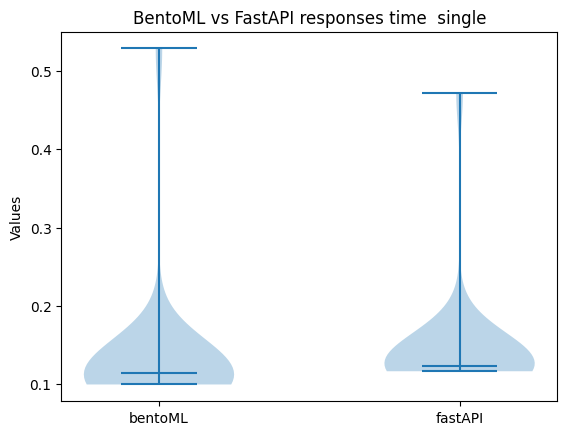

In [2]:
from model_serving.request_to_service import request_multiple,  url_bentoml, url_fastAPI, plot_results, plot_violins

results_fastAPI = request_multiple(url=url_fastAPI, dataframe=splitter.X_test.head(500), n_requests=25)
results_bentoml = request_multiple(url=url_bentoml, dataframe=splitter.X_test.head(500), n_requests=25)

plot_violins(results_bentoml, results_fastAPI, add_title=' single', labels= ["bentoML", "fastAPI"])

Prediction Batch: {'predictions': [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

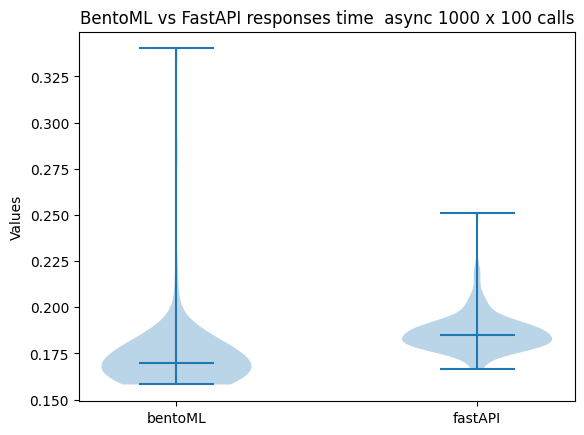

In [8]:
from model_serving.request_to_service import request_multiple,  url_bentoml, url_fastAPI, plot_results, plot_violins

results_fastAPI = request_multiple(url=url_fastAPI, dataframe=splitter.X_test.head(1000), n_requests=100)
results_bentoml = request_multiple(url=url_bentoml, dataframe=splitter.X_test.head(1000), n_requests=100)

plot_violins(results_bentoml, results_fastAPI, add_title=' async 1000 x 100 calls', labels= ["bentoML", "fastAPI"])